In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
from calculations import *
from plot_helper import *
import matplotlib.patches as patches

model = YOLO("models/WhatsappWindow_Models/v3.pt")

In [27]:
monitor_resoution = (2880, 1864)
image_path = "testing_image/ss3.png"
original_size = 896
resized_size = closestNumber(min(monitor_resoution), 32)

Shape of the RGB image tensor: torch.Size([3, 896, 896])


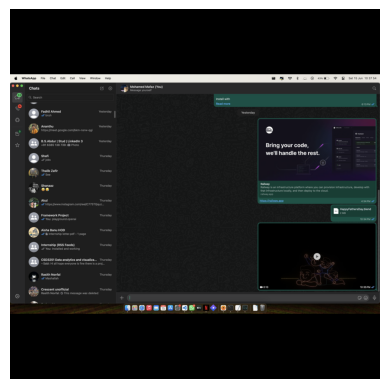


0: 896x896 1 window, 1839.8ms
Speed: 0.0ms preprocess, 1839.8ms inference, 7.2ms postprocess per image at shape (1, 3, 896, 896)
Shape: (896, 896, 3)


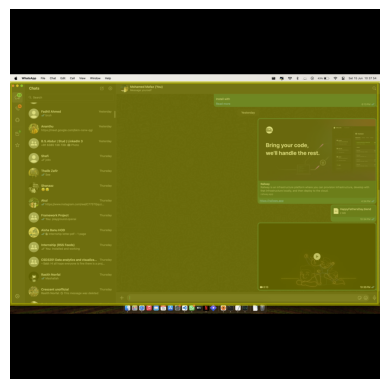

In [28]:
boxes = predict_and_show(model = model, image_path=image_path, shape = original_size)

Shape: (1113, 1847, 3)


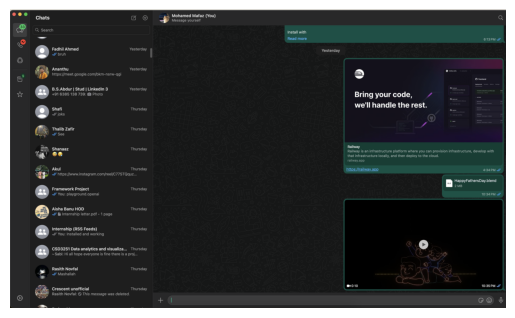

In [29]:
image_cropped = crop_resizebbox(image_path, 
                                original_size, resized_size, boxes_xyxy = boxes)

plt.imshow(image_cropped)
plt.axis("off")
plt.imsave("testing output images/output3.png", image_cropped)